# Team Ladybirds

Ana Sustic (AS), Elena Lestini (EL), Rudo N Takavarasha (RNT)

# Data analysed

For this study we used data made available online by freeCodeCamp (https://github.com/freeCodeCamp/2016-new-coder-survey ). The survey was designed by CodeNewbie and Free Code Camp as an anonymous 5-minute survey. More than 15,000 participants from 169 countries have answered the survay from March 28 through May 2 (2016). The 2016 New Coder Survey is made available under the Open Database License: http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/

# Definition of activities for team Ladybirds

Udacity Data Scholars beneficiaries of Bertelsmann Data Science Challenge Scholarship Course and participants of Team 39 listed different interesting aspects that could be derived from questions available on survey, the suggestions were voted and top three divided between each of three subgroups (Butterflies, Dragonflies and Ladybirds). 

The Ladybirds group decided to analyse and visualise age and gender to hours spent studying. These relate to the following questions from the survey (https://github.com/freeCodeCamp/2016-new-coder-survey/blob/master/raw-data/survey-questions.txt): 
* 2.01 age
* 2.02 gender
* 1.11 hours spent studying
  

#### Read the data from URL.

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn
url = "https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')),low_memory=False) #read the data from url

In [2]:
data.shape #number and size of dimensions 

(15620, 113)

#### Dataset has 15620 raws and 113 columns.

In [3]:
data.size #numer of items

1765060

#### Dataset has 1765060 items.

In [4]:
age = data.Age 

In [5]:
print(age)

0        28.0
1        22.0
2        19.0
3        26.0
4        20.0
5        34.0
6        23.0
7        35.0
8        33.0
9        33.0
10       57.0
11       23.0
12       47.0
13        NaN
14       31.0
15       27.0
16       29.0
17       30.0
18       30.0
19       25.0
20       29.0
21       44.0
22       21.0
23       21.0
24       28.0
25       25.0
26       24.0
27       23.0
28       34.0
29       18.0
         ... 
15590    49.0
15591    34.0
15592    29.0
15593    29.0
15594    32.0
15595    44.0
15596    45.0
15597    34.0
15598    51.0
15599    28.0
15600    38.0
15601    41.0
15602    35.0
15603    48.0
15604    32.0
15605    34.0
15606    53.0
15607    36.0
15608    40.0
15609    54.0
15610    29.0
15611    36.0
15612    43.0
15613    36.0
15614    30.0
15615    28.0
15616    43.0
15617    43.0
15618    37.0
15619    30.0
Name: Age, Length: 15620, dtype: float64


#### The output for Age shows us that the Age variable is encoded as numeric data types (floats) but a same values for age are NaN.

In [6]:
age.describe()

count    13613.000000
mean        29.175421
std          9.017716
min         10.000000
25%         23.000000
50%         27.000000
75%         33.000000
max         86.000000
Name: Age, dtype: float64

#### We can see that the count of age(13613) is less than the total row count of hte data set(15620). This indicates missing data.

In [7]:
missing_age =  2007/15620

In [8]:
print(missing_age)

0.12848911651728553


In [9]:
missing = np.where(age.isnull() == True)
missing

(array([   13,    89,   556, ..., 15158, 15184, 15351]),)

In [10]:
len(missing[0])

2007

#### It appears 12.8% of Age values are missing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e1795cf28>]],
      dtype=object)

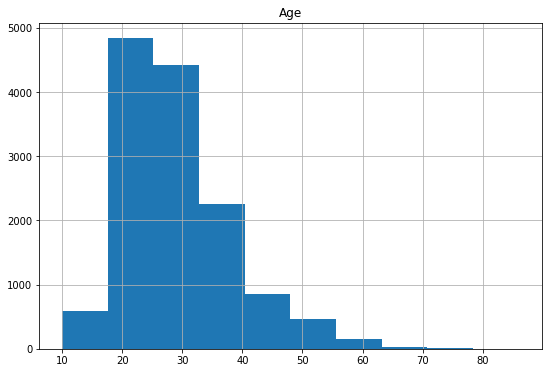

In [11]:
data.hist(column='Age',    # Column to plot
                figsize=(9,6),   # Plot size
                bins=10)         # Number of histogram bins

#### From the histogram, we see that ages between 24 and 32 are the most common, so filling in missing values with a central number like the mean wouldn't be entirely unreasonable. Let's fill in the missing values with the mean value of 29.17.

In [12]:
new_age_var = np.where(age.isnull(), # Logical check
                       29.17,                       # Value if check is true
                       age)     # Value if check is false

data["Age"] = new_age_var 
data["Age"].describe()

count    15620.000000
mean        29.174724
std          8.418427
min         10.000000
25%         24.000000
50%         29.000000
75%         32.000000
max         86.000000
Name: Age, dtype: float64

In [13]:
hours_learning = data.HoursLearning 

In [14]:
print(hours_learning)

0        30.0
1        30.0
2        20.0
3        20.0
4        25.0
5         5.0
6         8.0
7         NaN
8         5.0
9        20.0
10        8.0
11        5.0
12        5.0
13        5.0
14       10.0
15        4.0
16        5.0
17        2.0
18       20.0
19        NaN
20       10.0
21       30.0
22       25.0
23       25.0
24        1.0
25       10.0
26        NaN
27       20.0
28       20.0
29       10.0
         ... 
15590    20.0
15591    10.0
15592     2.0
15593     7.0
15594    12.0
15595     5.0
15596     5.0
15597    15.0
15598    30.0
15599     2.0
15600     6.0
15601     2.0
15602    15.0
15603    10.0
15604     1.0
15605     3.0
15606    10.0
15607    69.0
15608    10.0
15609    10.0
15610     8.0
15611    10.0
15612     3.0
15613     1.0
15614     2.0
15615    20.0
15616     3.0
15617     6.0
15618    40.0
15619     4.0
Name: HoursLearning, Length: 15620, dtype: float64


#### The output for HoursLearning shows us that the HoursLearning variable is encoded as numeric data types (floats) but a same values for age are NaN.

In [15]:
hours_learning.describe()

count    14942.000000
mean        15.323317
std         14.274867
min          0.000000
25%          5.000000
50%         10.000000
75%         20.000000
max        100.000000
Name: HoursLearning, dtype: float64

#### We can see that the count of hours spent learning (14942) is less than the total row count of the data set(15620). This indicates missing data.

In [16]:
missing = np.where(hours_learning.isnull() == True)
missing

(array([    7,    19,    26,    40,    94,   151,   182,   195,   216,
          234,   250,   291,   305,   336,   344,   345,   356,   369,
          393,   465,   468,   515,   578,   581,   589,   619,   628,
          676,   683,   699,   703,   707,   750,   801,   846,   858,
          860,   861,   968,   972,   993,  1043,  1046,  1060,  1066,
         1069,  1070,  1108,  1182,  1215,  1227,  1240,  1272,  1287,
         1358,  1375,  1395,  1427,  1467,  1507,  1524,  1593,  1597,
         1632,  1659,  1692,  1706,  1712,  1727,  1728,  1743,  1755,
         1761,  1778,  1821,  1849,  1860,  1883,  1943,  1963,  1983,
         2001,  2016,  2053,  2058,  2072,  2086,  2090,  2106,  2112,
         2138,  2151,  2165,  2172,  2177,  2218,  2232,  2237,  2388,
         2404,  2460,  2479,  2486,  2490,  2500,  2508,  2523,  2536,
         2538,  2560,  2568,  2589,  2597,  2602,  2637,  2663,  2673,
         2702,  2773,  2812,  2815,  2817,  2821,  2824,  2826,  2835,
      

In [17]:
len(missing[0])

678

In [18]:
678/15620

0.04340588988476313

#### It appears 4.34% of Age values are missing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e19601080>]],
      dtype=object)

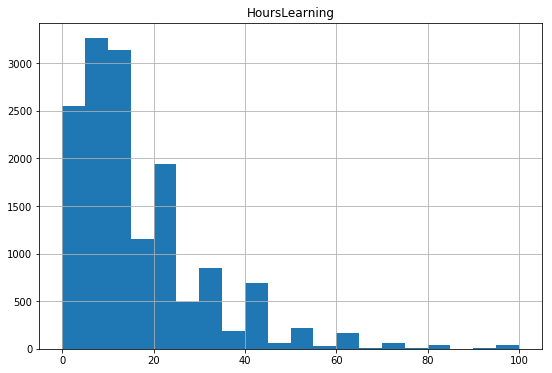

In [19]:
data.hist(column='HoursLearning',    # Column to plot
                figsize=(9,6),   # Plot size
                bins=20)         # Number of histogram bins

#### From the histogram, we see that most people study between 5 and 20 hours, so filling in missing values with a central number like the mean wouldn't be entirely unreasonable. Let's fill in the missing values with the mean value of 15.32.

In [20]:
new_hours_var = np.where(hours_learning.isnull(), # Logical check
                       15.32,                       # Value if check is true
                       hours_learning)     # Value if check is false

data["HoursLearning"] = new_hours_var 
data["HoursLearning"].describe()

count    15620.000000
mean        15.323173
std         13.961604
min          0.000000
25%          5.000000
50%         10.000000
75%         20.000000
max        100.000000
Name: HoursLearning, dtype: float64

In [21]:
data["Gender"].describe() 

count     13746
unique        5
top        male
freq      10766
Name: Gender, dtype: object

In [22]:
missing = np.where(data["Gender"].isnull() == True)
missing

(array([   89,   569,   614, ..., 14096, 14376, 14457]),)

In [23]:
len(missing[0])

1874

In [24]:
1874/15620

0.11997439180537772

In [37]:
new_gender_var = np.where(data["Gender"].isnull(), # Logical check
                       "Other",                       # Value if check is true
                       data["Gender"])     # Value if check is false

data["Gender"] = new_gender_var 
data["Gender"].describe()

count     15620
unique        6
top        male
freq      10766
Name: Gender, dtype: object

#### The Gender variable had originally 5 unique categories and we created a new category called "NewGender" for all 1874 missing values that represented 11.99% of total values for this variable.

In [26]:
pd.Categorical(data["Gender"]).describe()

,counts,freqs
categories,,
NewGender,1874,0.119974
agender,38,0.002433
female,2840,0.181818
genderqueer,66,0.004225
male,10766,0.689245
trans,36,0.002305


#### We can see the males account for 68.92% of the population.

In [38]:
data_gender = data.groupby(['Gender']).size()

In [39]:
print(data_gender)

Gender
NewGender       1874
agender           38
female          2840
genderqueer       66
male           10766
trans             36
dtype: int64


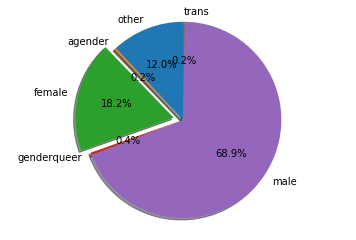

In [41]:
"""
===============
Basic pie chart
===============

Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.
"""
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'other','agender', 'female', 'genderqueer', 'male', 'trans'
sizes = [1874, 38, 2840, 66, 10766, 36]
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

data_gender, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# link 
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-14.html

/home/asustic/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/asustic/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


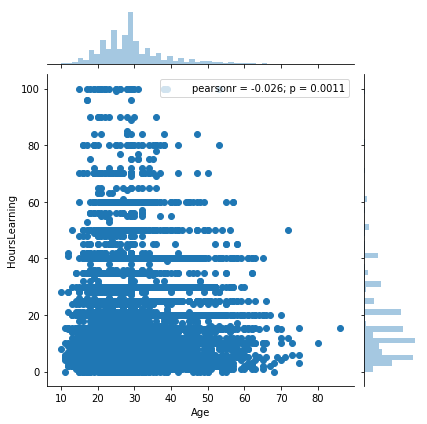

In [27]:
seaborn.jointplot(x = 'Age', y = 'HoursLearning', data = data)

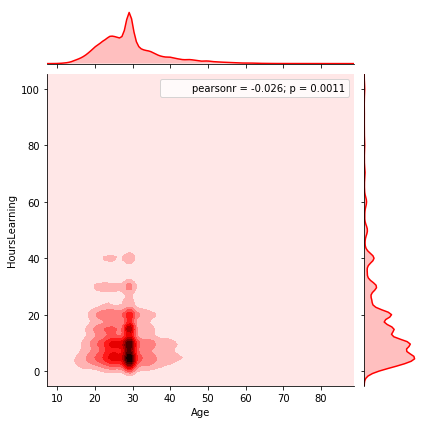

In [28]:
seaborn.jointplot(x = 'Age', y = 'HoursLearning', data = data, kind = 'kde', color = 'r')

In [34]:
# seaborn.swarmplot(x = 'Gender', y = 'HoursLearning', data = data) #this plot takes too much time to compute

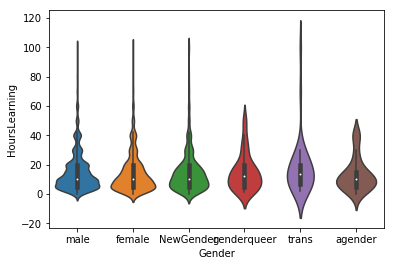

In [30]:
ax = seaborn.violinplot(x = "Gender", y = "HoursLearning", data = data, inner = 'box')

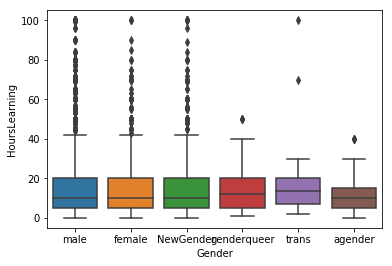

In [31]:
seaborn.boxplot(x = 'Gender', y = 'HoursLearning', data = data)

/home/asustic/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


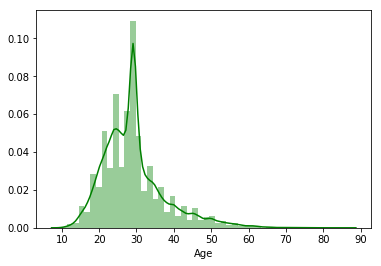

In [32]:
seaborn.distplot(data['Age'], color='green')

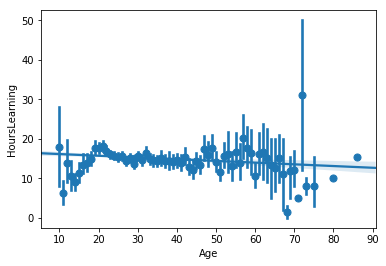

In [33]:
seaborn.regplot(x = 'Age', y = 'HoursLearning', data = data, x_estimator = np.mean)

In [42]:
female_data = data[data['Gender'] == 'female']
male_data = data[data['Gender'] == 'male']
agender_data = data[data['Gender'] == 'agender']
trans_data = data[data['Gender'] == 'trans']
genderqueer_data = data[data['Gender']=='genderqueer']

/home/asustic/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


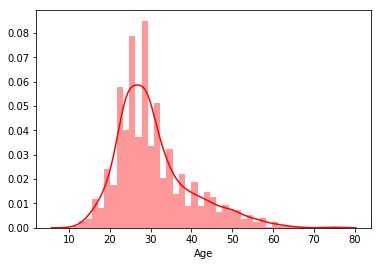

In [44]:
seaborn.distplot(female_data['Age'], color='red')

/home/asustic/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


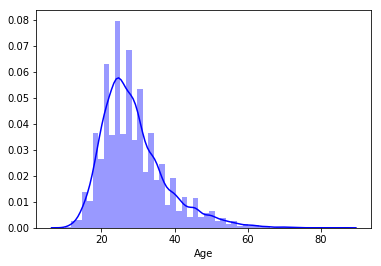

In [45]:
seaborn.distplot(male_data['Age'], color='blue')